In [43]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
# SET WORK DERC

# For my Mac
# os.chdir('//Users//patricklee//Desktop//파이썬//DACON//AI_workout')

# For my Desktop
os.chdir('C://Users//BIS_COM//data//dacon/workout/')

In [2]:
train=pd.read_csv('./new_value_df.csv',)
train_labels=pd.read_csv('./train_labels.csv')
test=pd.read_csv('./new_test_df.csv')
submission=pd.read_csv('./sample_submission.csv')

In [3]:
train

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,pitch,roll,angle_z,gg_x,gg_y,gg_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112,79.073624,-8.396683,-83.058839,-0.011832,-0.610980,-0.633522
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216,78.159835,-8.698302,-82.029235,0.006062,-0.782782,-0.498544
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629,76.226605,-8.352177,-79.126797,-0.072346,-0.882451,-0.500393
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013,76.298763,-9.967037,-80.694753,0.054260,-1.071957,-0.549080
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234,77.384519,-8.096783,-80.390898,0.085734,-1.158131,-0.559225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437,-44.665405,-40.505406,73.156120,-0.587357,-2.080273,-1.525809
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087,-42.855425,-40.971520,70.862773,-0.602982,-2.035936,-1.532502
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125,-41.189947,-41.333028,68.854788,-0.557462,-1.975521,-1.587302
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478,-39.017186,-42.961261,68.092120,-0.472731,-1.982790,-1.605190


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scale = scaler.fit_transform(train.iloc[:,2:8])

In [13]:
X_scale.shape

(1875000, 6)

In [17]:
X_scale

array([[ 2.30731395, -0.02993881, -0.43210379,  0.01177622, -0.41085858,
        -0.4610072 ],
       [ 2.4210864 , -0.06332135, -0.50405798,  0.02648401, -0.52805221,
        -0.36545902],
       [ 2.44466434, -0.05674912, -0.65419852, -0.03796168, -0.59604099,
        -0.36676736],
       ...,
       [-0.30079408, -0.85972807,  0.65272173, -0.43669443, -1.34167232,
        -1.13616922],
       [-0.25312047, -0.88687322,  0.67300217, -0.36705138, -1.34663045,
        -1.14883112],
       [-0.18037304, -0.91696552,  0.69563447, -0.27304002, -1.36085149,
        -1.15473132]])

In [15]:
train.iloc[:,2:8] = X_scale

In [16]:
train

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,pitch,roll,angle_z,gg_x,gg_y,gg_z
0,0,0,2.307314,-0.029939,-0.432104,0.011776,-0.410859,-0.461007,79.073624,-8.396683,-83.058839,-0.011832,-0.610980,-0.633522
1,0,1,2.421086,-0.063321,-0.504058,0.026484,-0.528052,-0.365459,78.159835,-8.698302,-82.029235,0.006062,-0.782782,-0.498544
2,0,2,2.444664,-0.056749,-0.654199,-0.037962,-0.596041,-0.366767,76.226605,-8.352177,-79.126797,-0.072346,-0.882451,-0.500393
3,0,3,2.428612,-0.116782,-0.573407,0.066099,-0.725311,-0.401232,76.298763,-9.967037,-80.694753,0.054260,-1.071957,-0.549080
4,0,4,2.439475,-0.044220,-0.588886,0.091969,-0.784094,-0.408413,77.384519,-8.096783,-80.390898,0.085734,-1.158131,-0.559225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.367432,-0.845648,0.503707,-0.461266,-1.413128,-1.092639,-44.665405,-40.505406,73.156120,-0.587357,-2.080273,-1.525809
1874996,3124,596,-0.326315,-0.845833,0.578875,-0.474109,-1.382884,-1.097377,-42.855425,-40.971520,70.862773,-0.602982,-2.035936,-1.532502
1874997,3124,597,-0.300794,-0.859728,0.652722,-0.436694,-1.341672,-1.136169,-41.189947,-41.333028,68.854788,-0.557462,-1.975521,-1.587302
1874998,3124,598,-0.253120,-0.886873,0.673002,-0.367051,-1.346630,-1.148831,-39.017186,-42.961261,68.092120,-0.472731,-1.982790,-1.605190


In [18]:
X=tf.reshape(np.array(train.iloc[:,2:]),[-1, 600, 12])
X.shape

TensorShape([3125, 600, 12])

In [19]:
y = tf.keras.utils.to_categorical(train_labels['label']) 
y.shape

(3125, 61)

In [20]:
from keras.models import Sequential
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dense, LSTM,Dropout, GRU

In [58]:
model = Sequential()
model.add(Conv1D(filters=12, kernel_size=2, input_shape=(600,12)))
model.add(Conv1D(filters=6, kernel_size=2, input_shape=(600,12), activation='tanh'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(61, activation='softmax'))
model.summary()

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 599, 12)           300       
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 598, 6)            150       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 299, 6)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 299, 6)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                11400     
_________________________________________________________________
dense_3 (Dense)              (None, 61)                3111      
Total params: 14,961
Trainable params: 14,961
Non-trainable params: 0
__________________________________________________

In [59]:
history = model.fit(X,y, epochs=500, batch_size=128, validation_split=0.2, verbose=0)

In [60]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
                      
Epoch_range = range(1, len(acc) + 1)
Epoch_range

range(1, 501)

In [61]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

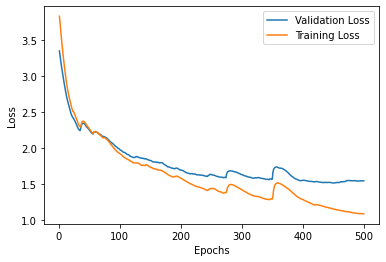

In [62]:
smooth_val_loss_history = smooth_curve(val_loss[0:])
smooth_loss_history = smooth_curve(loss[0:])

plt.plot(Epoch_range, smooth_val_loss_history,label="Validation Loss")
plt.plot(Epoch_range, smooth_loss_history, label="Training Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

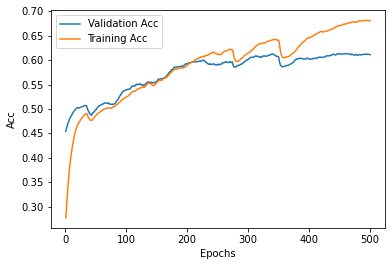

In [63]:
smooth_val_loss_history = smooth_curve(val_acc[0:])
smooth_loss_history = smooth_curve(acc[0:])

plt.plot(Epoch_range, smooth_val_loss_history,label="Validation Acc")
plt.plot(Epoch_range, smooth_loss_history, label="Training Acc")
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

# concatenate LSTM
# https://www.kaggle.com/frlemarchand/covid-19-forecasting-with-an-rnn

In [106]:
#temporal input branch
temporal_input_layer = Input(shape=(sequence_length,5))
main_rnn_layer = layers.LSTM(64, return_sequences=True, recurrent_dropout=0.2)(temporal_input_layer)

#demographic input branch
demographic_input_layer = Input(shape=(5))
demographic_dense = layers.Dense(16)(demographic_input_layer)
demographic_dropout = layers.Dropout(0.2)(demographic_dense)

#cases output branch
rnn_c = layers.LSTM(32)(main_rnn_layer)
merge_c = layers.Concatenate(axis=-1)([rnn_c,demographic_dropout])
dense_c = layers.Dense(128)(merge_c)
dropout_c = layers.Dropout(0.3)(dense_c)
cases = layers.Dense(1, activation=layers.LeakyReLU(alpha=0.1),name="cases")(dropout_c)

#fatality output branch
rnn_f = layers.LSTM(32)(main_rnn_layer)
merge_f = layers.Concatenate(axis=-1)([rnn_f,demographic_dropout])
dense_f = layers.Dense(128)(merge_f)
dropout_f = layers.Dropout(0.3)(dense_f)
fatalities = layers.Dense(1, activation=layers.LeakyReLU(alpha=0.1), name="fatalities")(dropout_f)


model = Model([temporal_input_layer,demographic_input_layer], [cases,fatalities])

model.summary()

NameError: name 'Input' is not defined

In [ ]:
callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=4, verbose=1, factor=0.6),
             EarlyStopping(monitor='val_loss', patience=20),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]
model.compile(loss=[tf.keras.losses.MeanSquaredLogarithmicError(),tf.keras.losses.MeanSquaredLogarithmicError()], optimizer="adam")

In [ ]:
history = model.fit([X_temporal_train,X_demographic_train], [Y_cases_train, Y_fatalities_train], 
          epochs = 250, 
          batch_size = 16, 
          validation_data=([X_temporal_test,X_demographic_test],  [Y_cases_test, Y_fatalities_test]), 
          callbacks=callbacks)

In [101]:
history = model.fit(X,y, epochs=500, batch_size=128, validation_split=0.2, verbose=0)

In [102]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
                      
Epoch_range = range(1, len(acc) + 1)
Epoch_range

range(1, 501)

In [103]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

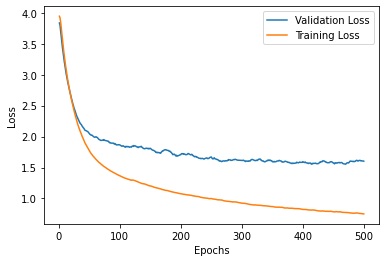

In [104]:
smooth_val_loss_history = smooth_curve(val_loss[0:])
smooth_loss_history = smooth_curve(loss[0:])

plt.plot(Epoch_range, smooth_val_loss_history,label="Validation Loss")
plt.plot(Epoch_range, smooth_loss_history, label="Training Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

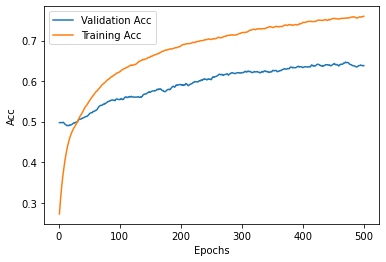

In [105]:
smooth_val_loss_history = smooth_curve(val_acc[0:])
smooth_loss_history = smooth_curve(acc[0:])

plt.plot(Epoch_range, smooth_val_loss_history,label="Validation Acc")
plt.plot(Epoch_range, smooth_loss_history, label="Training Acc")
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

# Submission

In [ ]:
test_X=tf.reshape(np.array(test.iloc[:,2:]),[-1, 600, 12])
test_X.shape

prediction=model_t.predict(test_X)

submission.iloc[:,1:]=prediction

submission.to_csv('1_try.csv')